In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
import os
sys.path.append(os.path.abspath('./'))
from mds.mds import geodesic_sample_points, mds
from mds.visualizationtools import add_axis_cube

SAMPLING

In [2]:
geodesic_index2, points2 = zip(*geodesic_sample_points(2,200))
points2 = np.array(points2)

In [3]:
geodesic_index3, points3 = zip(*geodesic_sample_points(3,200))
points3 = np.array(points3)

In [4]:
geodesic_index4, points4 = zip(*geodesic_sample_points(4,200))
points4 = np.array(points4)

In [24]:
geodesic_index5,points5 = zip(*geodesic_sample_points(5,200))
points5 = np.array(points5)

From m=7 onwards, visualizations look too crowded

In [5]:
geodesic_index7, points7 = zip(*geodesic_sample_points(7,200))
points7 = np.array(points7)

In [6]:
geodesic_index8, points8 = zip(*geodesic_sample_points(8,200))
points8 = np.array(points8)

In [8]:
geodesic_index15, points15 = zip(*geodesic_sample_points(12,400))
points15 = np.array(points15)

In [108]:
def plot_interpolation(x, y, z, point_idxs, cmap='viridis'):
    """
    Plots a 3D scatter plot of points, color-coded by group index with a smooth color progression.
    Additionally, interpolated geodesic lines are drawn, following the original sampling order, with varying line width to enhance depth perception.

    Parameters:
    - x (array-like): x-coordinates of points.
    - y (array-like): y-coordinates of points.
    - z (array-like): z-coordinates of points.
    - point_idxs (array-like): Group index for each point (used for color coding).
    - cmap (str): Colormap to use for the groups (default: 'viridis' for smooth progression).
    """
    x, y, z, point_idxs = map(np.array, (x, y, z, point_idxs))  
    colormap = cm.get_cmap(cmap)
    unique_idxs = np.unique(point_idxs)
    norm = plt.Normalize(vmin=min(unique_idxs), vmax=max(unique_idxs))
    colors = colormap(norm(point_idxs))  
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d', box_aspect=(1,1,1))
    
    #ax.scatter(x, y, z, c=colors, marker='o', s=20) 
    
    for group in unique_idxs:
        mask = point_idxs == group
        x_group, y_group, z_group = x[mask], y[mask], z[mask]
        
        # Maintain original order (as sampled from geodesic_sample_points)
        if len(x_group) > 1:
            t = np.arange(len(x_group))  
            t_interp = np.linspace(t[0], t[-1], 200)
            x_interp = np.interp(t_interp, t, x_group)
            y_interp = np.interp(t_interp, t, y_group)
            z_interp = np.interp(t_interp, t, z_group)
            
            depth_factor = np.mean(z_group)
            line_width = 1 + (depth_factor - np.min(z)) / (np.max(z) - np.min(z)) * 3  
            
            ax.plot(x_interp, y_interp, z_interp, color=colormap(norm(group)), linewidth=line_width)

    ax.set_title("Antipodal geodesics of $S^3$")
    ax.set_axis_off()
    #add_axis_cube(ax, 2)
    
    plt.show()

In [109]:
def plot_interpolation_difangle(x, y, z, point_idxs, cmap='viridis'):
    """
    Plots 3D interpolated geodesic lines, following the original sampling order, with varying line width to enhance depth perception.

    Parameters:
    - x (array-like): x-coordinates of points.
    - y (array-like): y-coordinates of points.
    - z (array-like): z-coordinates of points.
    - point_idxs (array-like): Group index for each point (used for color coding).
    - cmap (str): Colormap to use for the groups (default: 'viridis' for smooth progression).
    """
    x, y, z, point_idxs = map(np.array, (x, y, z, point_idxs)) 
    colormap = cm.get_cmap(cmap)
    unique_idxs = np.unique(point_idxs)
    norm = plt.Normalize(vmin=min(unique_idxs), vmax=max(unique_idxs))
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d', box_aspect=(1,1,1))
    
    for group in unique_idxs:
        mask = point_idxs == group
        x_group, y_group, z_group = x[mask], y[mask], z[mask]
        
        # Maintain original order (as sampled from geodesic_sample_points)
        if len(x_group) > 1:
            t = np.arange(len(x_group))
            t_interp = np.linspace(t[0], t[-1], 200)
            x_interp = np.interp(t_interp, t, x_group)
            y_interp = np.interp(t_interp, t, y_group)
            z_interp = np.interp(t_interp, t, z_group)
            
            depth_factor = np.mean(z_group)
            line_width = 1 + (depth_factor - np.min(z)) / (np.max(z) - np.min(z)) * 3  
            
            ax.plot(x_interp, y_interp, z_interp, color=colormap(norm(group)), linewidth=line_width)
    
    ax.view_init(elev=30, azim=95)  
    ax.set_title("Antipodal geodesics of $S^3$")
    ax.set_axis_off()

    plt.show()


In [110]:
def plot_3d(x, y, z, point_idxs, cmap='viridis'):
    """
    Plots a 3D scatter plot of points, color-coded by group index with a smooth color progression.

    Parameters:
    - x (array-like): x-coordinates of points.
    - y (array-like): y-coordinates of points.
    - z (array-like): z-coordinates of points.
    - point_idxs (array-like): Group index for each point (used for color coding).
    - cmap (str): Colormap to use for the groups (default: 'viridis' for smooth progression).
    """
    colormap = cm.get_cmap(cmap)
    unique_idxs = np.unique(point_idxs)
    norm = plt.Normalize(vmin=min(unique_idxs), vmax=max(unique_idxs))
    colors = colormap(norm(point_idxs)) 
    
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d', box_aspect=(1,1,1))
    
    ax.scatter(x, y, z, c=colors, marker='o', s=20)  
    
    ax.set_title("Antipodal geodesics encoded by colour")
    ax.set_axis_off()
    
    plt.show()

# m=2

In [12]:
x2,y2,z2 = mds(points2,3)

There are 400 eigenvalues.
Number of large, non-zero eigenvalues for approximate embedding: 391 (97.75%)


C:\Users\laura\AppData\Local\Temp\ipykernel_6292\235225740.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


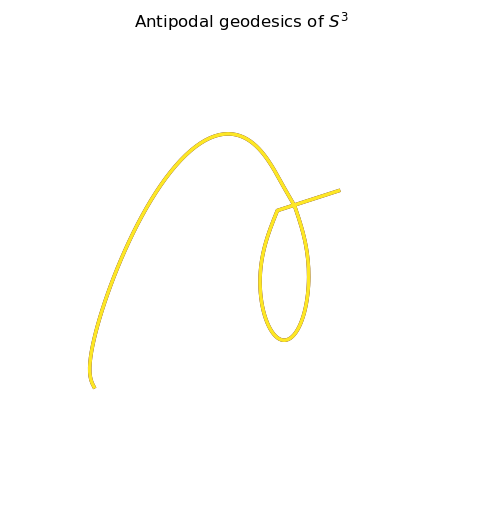

In [94]:
plot_interpolation(x2,y2,z2,geodesic_index2)

C:\Users\laura\AppData\Local\Temp\ipykernel_6292\2932549930.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


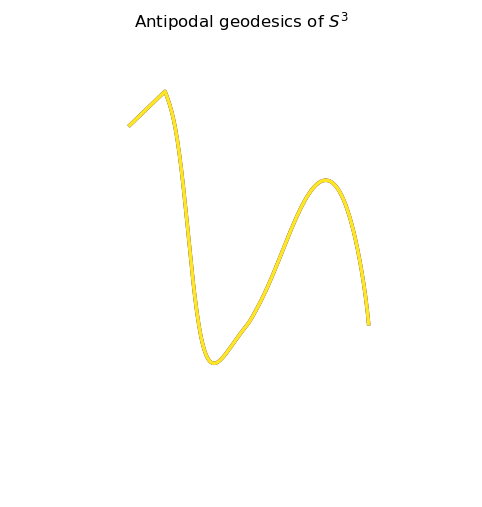

In [95]:
plot_interpolation_difangle(x2,y2,z2,geodesic_index2)

# m =3

In [52]:
x3, y3, z3 = mds(points3, 3)

There are 600 eigenvalues.
Number of large, non-zero eigenvalues for approximate embedding: 584 (97.33%)


C:\Users\laura\AppData\Local\Temp\ipykernel_6292\235225740.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


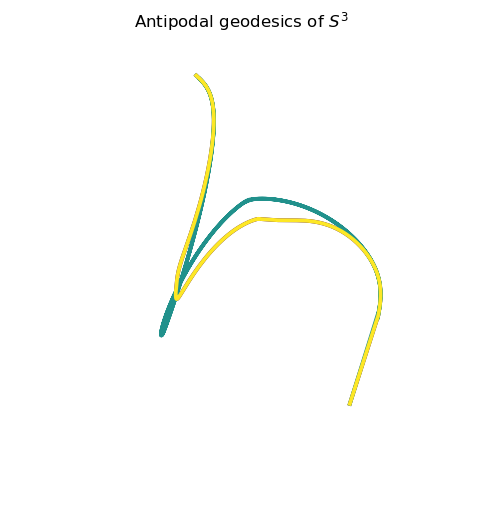

In [96]:
plot_interpolation(x3, y3, z3, geodesic_index3)

C:\Users\laura\AppData\Local\Temp\ipykernel_6292\2932549930.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


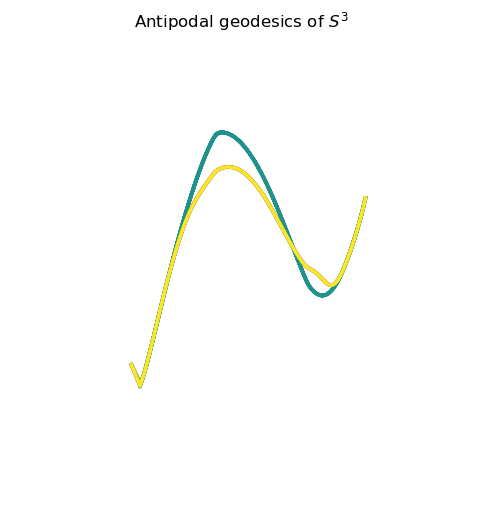

In [97]:
plot_interpolation_difangle(x3, y3, z3, geodesic_index3)

# m=4

In [25]:
x4, y4, z4 = mds(points4, 3)

There are 800 eigenvalues.
Number of large, non-zero eigenvalues for approximate embedding: 771 (96.38%)


C:\Users\laura\AppData\Local\Temp\ipykernel_6292\2932549930.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


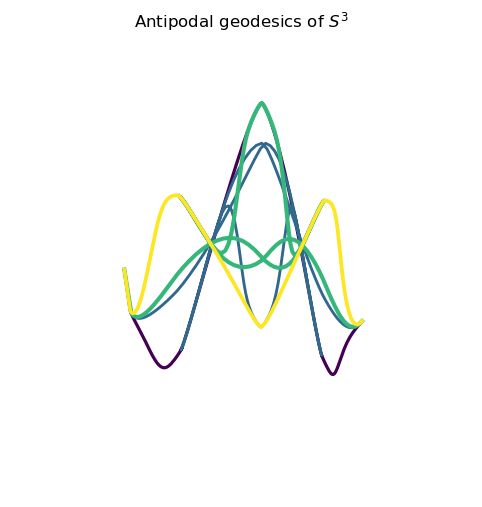

In [98]:
plot_interpolation_difangle(x4, y4, z4, geodesic_index4)

# m=5

In [38]:
x5_3d, y5_3d, z5_3d = mds(points5, 3)

There are 1000 eigenvalues.
Number of large, non-zero eigenvalues for approximate embedding: 960 (96.00%)


C:\Users\laura\AppData\Local\Temp\ipykernel_6292\2932549930.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


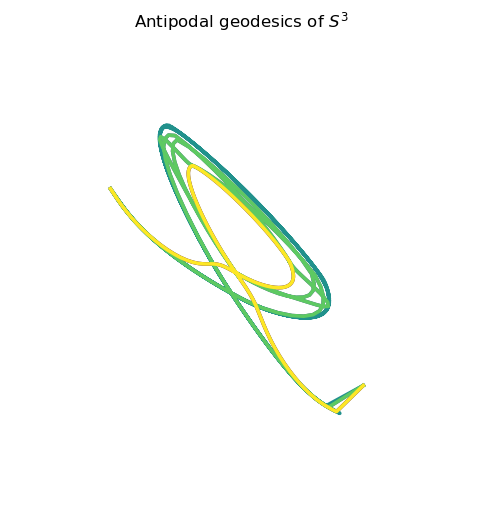

In [99]:
plot_interpolation_difangle(z5_3d, y5_3d, z5_3d, geodesic_index5)

# m=7

In [42]:
x7, y7, z7 = mds(points7, 3)

There are 1400 eigenvalues.
Number of large, non-zero eigenvalues for approximate embedding: 1342 (95.86%)


C:\Users\laura\AppData\Local\Temp\ipykernel_6292\235225740.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


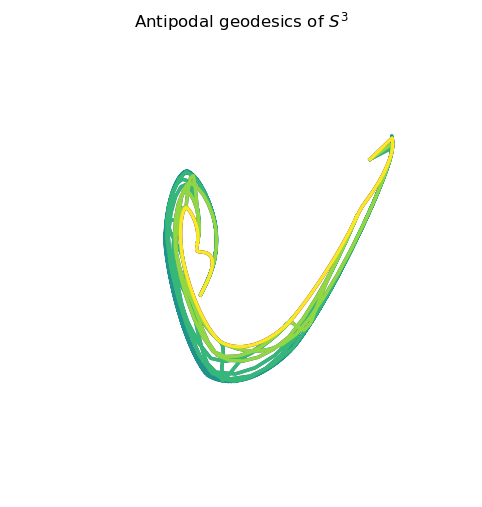

In [100]:
plot_interpolation(x7, y7, z7, geodesic_index7)

# m=8

In [47]:
x8, y8, z8 = mds(points8, 3)

There are 1600 eigenvalues.
Number of large, non-zero eigenvalues for approximate embedding: 1535 (95.94%)


C:\Users\laura\AppData\Local\Temp\ipykernel_6292\2932549930.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


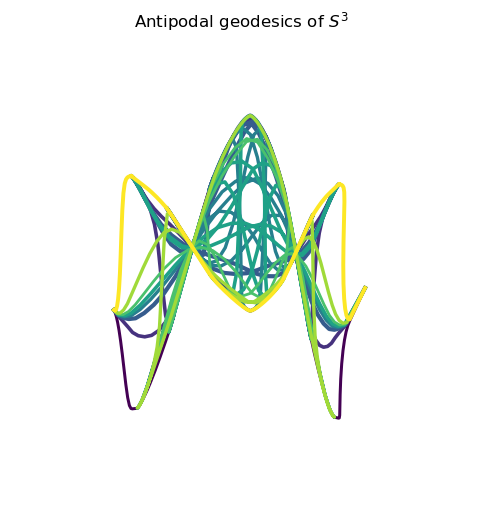

In [101]:
plot_interpolation_difangle(x8, y8, z8, geodesic_index8)

# m = 12

In [56]:
x15_3d, y15_3d, z15_3d = mds(points15,3)

There are 4800 eigenvalues.
Number of large, non-zero eigenvalues for approximate embedding: 3605 (75.10%)


C:\Users\laura\AppData\Local\Temp\ipykernel_6292\2932549930.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


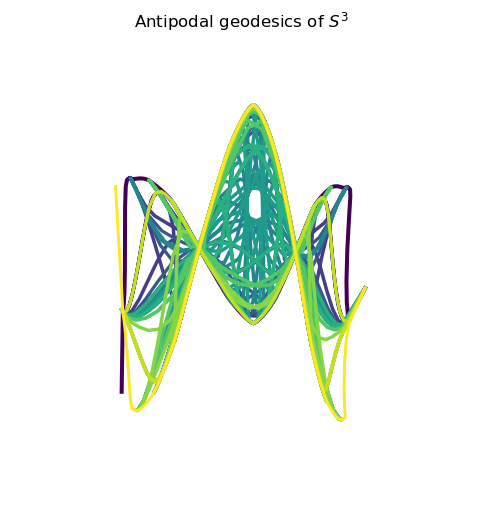

In [102]:
plot_interpolation_difangle(x15_3d, y15_3d, z15_3d, geodesic_index15)

C:\Users\laura\AppData\Local\Temp\ipykernel_6292\2712251865.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap(cmap)


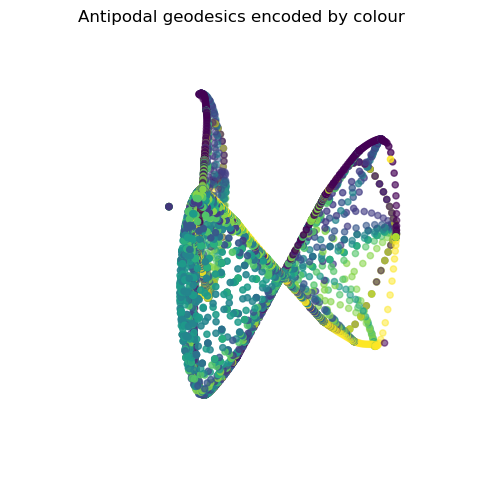

In [112]:
plot_3d(x15_3d, y15_3d, z15_3d, geodesic_index15)